# ROC-AUC

## ROC

When you have a **binary classification** problem, the ROC is a good way to decide what probability threshold you should use when making your predictions. 

Why? Because it let's you see what happens to your **True Positive Rate** and your **False Positive Rate** when you adjust that threshold.

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Import Data / EDA

In [ ]:
data = load_breast_cancer()

X = pd.DataFrame(data['data'], columns=data['feature_names'])
y = pd.Series(data['target'], name='diagnosis')

In [ ]:
X.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [ ]:
y.value_counts(normalize=True)

1    0.627417
0    0.372583
Name: diagnosis, dtype: float64

In [ ]:
data['target_names']

array(['malignant', 'benign'], dtype='<U9')

## Train-test Split

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, 
                                                  stratify=y, random_state=42)

## Baseline

In [ ]:
print('Baseline accuracy:', y_train.value_counts(normalize=True).max())

Baseline accuracy: 0.6263736263736264


## Build our model

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
# Instantiate
log_model = LogisticRegression()

# Fit with training data
log_model.fit(X_train, y_train);

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [ ]:
print('training accuracy:', log_model.score(X_train, y_train))
print('validation accuracy:', log_model.score(X_val, y_val))

training accuracy: 0.945054945054945
validation accuracy: 0.956140350877193


In [ ]:
from sklearn.metrics import classification_report

In [ ]:
y_pred = log_model.predict(X_val)
print(classification_report(y_val, y_pred, target_names=data['target_names']))

              precision    recall  f1-score   support

   malignant       0.97      0.90      0.94        42
      benign       0.95      0.99      0.97        72

    accuracy                           0.96       114
   macro avg       0.96      0.95      0.95       114
weighted avg       0.96      0.96      0.96       114



## Check ROC

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

In [ ]:
y_pred_prob = log_model.predict_proba(X_val)[:, -1]

In [ ]:
fpr, tpr, thresholds = roc_curve(y_val, y_pred_prob)

df = pd.DataFrame({'False Positive Rate': fpr,
              'True Positive Rate': tpr,
              'Threshold': np.round(thresholds, 2)})

In [ ]:
df

,False Positive Rate,True Positive Rate,Threshold
0,0.000000,0.000000,2.00
1,0.000000,0.013889,1.00
2,0.000000,0.902778,0.84
3,0.023810,0.902778,0.83
4,0.023810,0.916667,0.82
5,0.047619,0.916667,0.81
6,0.047619,0.930556,0.77
7,0.071429,0.930556,0.76
8,0.071429,0.986111,0.53
9,0.095238,0.986111,0.52


Text(0, 0.5, 'True Positive Rate')

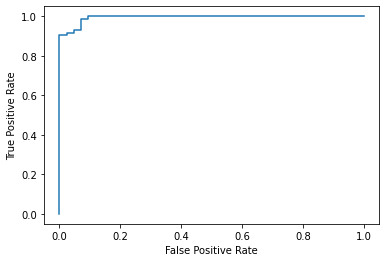

In [ ]:
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')

## ROC-AUC for model comparison

In [ ]:
from sklearn.tree import DecisionTreeClassifier

tree_model = DecisionTreeClassifier()
tree_model.fit(X_train, y_train)

print('training accuracy:', tree_model.score(X_train, y_train))
print('validation accuracy:', tree_model.score(X_val, y_val))

training accuracy: 1.0
validation accuracy: 0.9035087719298246


In [ ]:
y_pred_prob_tree = tree_model.predict_proba(X_val)[:, -1]

fpr2, tpr2, thresholds2 = roc_curve(y_val, y_pred_prob_tree)

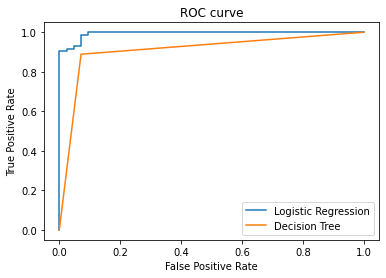

In [ ]:
plt.plot(fpr, tpr, label='Logistic Regression')
plt.plot(fpr2, tpr2, label='Decision Tree')
plt.legend()
plt.title('ROC curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate');

In [ ]:
print('logistic', roc_auc_score(y_val, y_pred_prob))
print('tree', roc_auc_score(y_val, y_pred_prob_tree))

logistic 0.9937169312169312
tree 0.9087301587301587
